# Data Science Part Time Course

## Week 5 - Lesson 2 - Lab 2: Databases with Python

In this Lab the goal is connect to a database (created form a local file), read the data into Python and interact with it.

## 1. Data import

Connect to the file 'assets/datasets/enron.db' using one of these methods:

- sqlite3 python package
- pandas.read_sql
- SQLite Manager Firefox extension

Take a look at the database and query the master table. How many Tables are there in the db?

> Answer:
There are 3 tables:
- MessageBase
- RecipientBase
- EmployeeBase

In [1]:
import sqlite3
conn = sqlite3.connect('enron.db') 
c = conn.cursor()
c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

[('MessageBase',), ('RecipientBase',), ('EmployeeBase',)]

Query the `sqlite_master` table to retrieve the **schema** of the `EmployeeBase` table.

1. What fields are there?
1. What's the type of each of them?

In [3]:
fields = c.execute("SELECT sql from sqlite_master WHERE type='table' and name='MessageBase';").fetchall()
print (''.join(fields[0]))

fields = c.execute("SELECT sql from sqlite_master WHERE type='table' and name='RecipientBase';").fetchall()
print (''.join(fields[0]))

fields = c.execute("SELECT sql from sqlite_master WHERE type='table' and name='EmployeeBase';").fetchall()
print (''.join(fields[0]))

CREATE TABLE MessageBase (
    mid INTEGER,
    filename TEXT,
    unix_time INTEGER,
    subject TEXT,
    from_eid INTEGER,
    
    PRIMARY KEY(mid ASC),
    FOREIGN KEY(from_eid) REFERENCES Employee(eid)
)
CREATE TABLE RecipientBase (
    mid INTEGER,
    rno INTEGER,
    to_eid INTEGER,
    
    PRIMARY KEY(mid ASC, rno ASC)
    FOREIGN KEY(mid) REFERENCES Message(mid)
    FOREIGN KEY(to_eid) REFERENCES Employee(eid)
)
CREATE TABLE EmployeeBase (
                  [eid] INTEGER,
  [name] TEXT,
  [department] TEXT,
  [longdepartment] TEXT,
  [title] TEXT,
  [gender] TEXT,
  [seniority] TEXT
                  
                  )


1. Print the first 5 rows of EmployeeBase table
1. Print the first 5 rows of MessageBase table
1. Print the first 5 rows of RecipientBase table

**Hint**  use `SELECT` and `LIMIT`.

In [4]:
results = c.execute("SELECT * FROM EmployeeBase LIMIT 5;").fetchall()
for row in results:
    print (row)

(1, 'John Arnold', 'Forestry', 'ENA Gas Financial', 'VP Trading', 'Male', 'Senior')
(2, 'Harry Arora', 'Forestry', 'ENA East Power', 'VP Trading', 'Male', 'Senior')
(3, 'Robert Badeer', 'Forestry', 'ENA West Power', 'Mgr Trading', 'Male', 'Junior')
(4, 'Susan Bailey', 'Legal', 'ENA Legal', 'Specialist Legal', 'Female', 'Junior')
(5, 'Eric Bass', 'Forestry', 'ENA Gas Texas', 'Trader', 'Male', 'Junior')


In [5]:
results = c.execute("SELECT * FROM MessageBase LIMIT 5;").fetchall()
for row in results:
    print (row)

(1, 'taylor-m/sent/11', 910930020, 'Cd$ CME letter', 138)
(2, 'taylor-m/sent/17', 911459940, 'Indemnification', 138)
(3, 'taylor-m/sent/18', 911463840, 'Re: Indemnification', 138)
(4, 'taylor-m/sent/23', 911874180, 'Re: Coral Energy, L.P.', 138)
(5, 'taylor-m/sent/27', 912396120, 'Bankruptcy Code revisions', 138)


In [6]:
results = c.execute("SELECT * FROM RecipientBase LIMIT 10;").fetchall()
for row in results:
    print (row)
    
# The first field is message id, the second is recipient number, and the third is the id of the recipient.
# mid, rno, to_eid

(1, 1, 59)
(2, 1, 15)
(3, 1, 15)
(4, 1, 109)
(4, 2, 49)
(4, 3, 120)
(4, 4, 59)
(5, 1, 45)
(5, 2, 53)
(6, 1, 113)


Now try other SQL statements on the local database, such as SELECT .... FROM ... WHERE ....

For example, print the records of EmployeeBase where the Gender is male 

In [8]:
results = c.execute("SELECT * FROM EmployeeBase WHERE gender = 'Male';").fetchall()
for row in results:
    print (row)

(1, 'John Arnold', 'Forestry', 'ENA Gas Financial', 'VP Trading', 'Male', 'Senior')
(2, 'Harry Arora', 'Forestry', 'ENA East Power', 'VP Trading', 'Male', 'Senior')
(3, 'Robert Badeer', 'Forestry', 'ENA West Power', 'Mgr Trading', 'Male', 'Junior')
(5, 'Eric Bass', 'Forestry', 'ENA Gas Texas', 'Trader', 'Male', 'Junior')
(6, 'Don Baughman Jr.', 'Forestry', 'ENA East Power', 'Mgr Trading', 'Male', 'Junior')
(8, 'Robert Benson', 'Forestry', 'ENA East Power', 'Dir Trading', 'Male', 'Senior')
(11, 'Rick Buy', 'Forestry', 'Enron', 'VP & CRO', 'Male', 'Senior')
(12, 'Larry Campbell', 'Other', 'ETS', 'Specialist', 'Male', 'Junior')
(13, 'Larry F. Campbell', 'Other', 'ENA East Power', 'Specialist', 'Male', 'Junior')
(14, 'Mike Carson', 'Forestry', 'ENA East Power', 'Mgr Trading', 'Male', 'Junior')
(18, 'Sean Crandall', 'Forestry', 'ENA West Power', 'Dir Trading', 'Male', 'Senior')
(19, 'Martin Cuilla', 'Forestry', 'ENA Gas Central', 'Mgr Trading', 'Male', 'Junior')
(20, 'Jeff Dasovich', 'Legal

#### Import each of the 3 tables to a Pandas Dataframes

In [9]:
import pandas as pd
employees = pd.read_sql("SELECT * FROM EmployeeBase;", conn)
recipients = pd.read_sql("SELECT * FROM RecipientBase;", conn)
messages = pd.read_sql("SELECT * FROM MessageBase;", conn)

In [10]:
recipients.head(10)

,mid,rno,to_eid
0,1,1,59
1,2,1,15
2,3,1,15
3,4,1,109
4,4,2,49
5,4,3,120
6,4,4,59
7,5,1,45
8,5,2,53
9,6,1,113


## 2. Data Exploration

Use the 3 dataframes to answer the following questions:

1. How many employees are there in the company?
- How many messages are there in the database?
- Some messages are sent to more than one recipient. Group the messages by message_id and count the number of recepients. Then look at the distribution of recepient numbers.
    - How many messages have only one recepient?
    - How many messages have >= 5 recepients?
    - What's the highest number of recepients?
    - Who sent the message with the highest number of recepients?
- Plot the distribution of recepient numbers using Bokeh.

In [11]:
len(employees)

156

In [12]:
len(messages)

21635

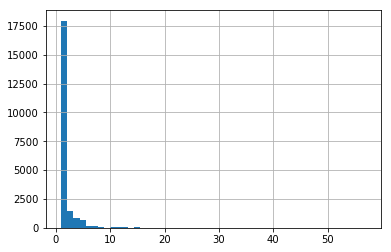

In [13]:
# Plotting historgram with Pandas Hist
%matplotlib inline
recipients.groupby('mid')['to_eid'].agg(['count'])['count'].hist(bins=50)

In [14]:
from collections import Counter

In [16]:
# using the below summary you can answer Question 3
# reminder that mid is the messageid and to_eid is the id of the recipient,  rno is the number of recipents for the msg
counts = Counter(recipients.groupby('mid')['to_eid'].count())
counts

Counter({1: 14985,
         2: 2962,
         3: 1435,
         4: 873,
         5: 711,
         6: 180,
         7: 176,
         8: 61,
         9: 24,
         10: 29,
         11: 47,
         12: 33,
         13: 57,
         14: 11,
         15: 28,
         16: 9,
         17: 2,
         18: 1,
         19: 1,
         20: 1,
         21: 2,
         22: 1,
         24: 1,
         49: 1,
         52: 1,
         55: 1,
         57: 2})

In [ ]:
from bokeh.plotting import figure,show,output_notebook
output_notebook()

In [ ]:
x = [i[0] for i in counts.most_common()]
y = [i[1] for i in counts.most_common()]
left_border = [val-0.5 for val in x]
right_border = [val+0.5 for val in x]


p= figure(title="Message Recipients",tools='',x_axis_label='# of recipients',y_axis_label='Counts')
p.quad(top=y,left=left_border,right=right_border,bottom=0,line_color='black')
show(p)

Rescale to investigate the tail of the curve

In [ ]:
x = [i[0] for i in counts.most_common()[5:]]  # chop off the first 5
y = [i[1] for i in counts.most_common()[5:]]  # chop off the first 5
left_border = [val-0.5 for val in x]
right_border = [val+0.5 for val in x]


p= figure(title="Message Recipients",tools='',x_axis_label='# of recipients',y_axis_label='Counts')
p.quad(top=y,left=left_border,right=right_border,bottom=0,line_color='black')
show(p)

## 3. Data Merging

Use the pandas merge function to combine the information in the 3 dataframes to answer the following questions:

1. Are there more Men or Women employees?
- How is gender distributed across departments?
- Who is sending more emails? Men or Women?
- What's the average number of emails sent by each gender?
- Are there more Juniors or Seniors?
- Who is sending more emails? Juniors or Seniors?
- Which department is sending more emails? How does that relate with the number of employees in the department?
- Who are the top 3 senders of emails? (people who sent out the most emails)

In [ ]:
employees.gender.value_counts()

More men

In [ ]:
employees.gender.value_counts() / employees.gender.count()

In [ ]:
# How is gender distributed across departments?
employees.groupby('department')['gender'].value_counts() / employees.groupby('department')['gender'].count()

    Forestry 83% Male
    Legal    48% Male
    Other    72% Male
    Company  72% Male

In [ ]:
# Who is sending more emails? Men or Women?
df = pd.merge(employees, messages, left_on='eid', right_on='from_eid')
df.gender.value_counts() / df.gender.count()

In [ ]:
# What's the average number of emails sent by each gender?
df.gender.value_counts() / employees.gender.value_counts()

Women sent almost twice as many messages on average

In [ ]:
employees.seniority.value_counts()

In [ ]:
df.seniority.value_counts()

In [ ]:
df.seniority.value_counts() / employees.seniority.value_counts()

Senior employees send more messages in absolute value and also on average

In [ ]:
# Which department is sending more emails? How does that relate with the number of employees in the department?
df.department.value_counts()

In [ ]:
df.department.value_counts() / employees.department.value_counts()

Legal is sending many more messages than the other departments

In [ ]:
# Who are the top 5 senders of emails? (people who sent out the most emails)
top5senders = df.eid.value_counts().head().reset_index()
top5senders.columns = ['eid', 'msgs_sent']
top5senders

In [ ]:
pd.merge(employees, top5senders, on='eid')